In [1]:
import pandas as pd
Covid_CSV = pd.read_csv('dataset/owid-covid-data.csv')
Covid_CSV

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387290,ZWE,Africa,Zimbabwe,2024-03-13,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387291,ZWE,Africa,Zimbabwe,2024-03-14,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387292,ZWE,Africa,Zimbabwe,2024-03-15,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387293,ZWE,Africa,Zimbabwe,2024-03-16,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [88]:
# ESERCIZIO 1
metadati = Covid_CSV.info()
dimensioni_dataset = Covid_CSV.shape

print("Dimensioni del dataset->", dimensioni_dataset)

print(metadati)

Covid_CSV.columns

continenti = Covid_CSV['continent'].unique()
print(continenti)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387295 entries, 0 to 387294
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    387295 non-null  object        
 1   continent                                   368751 non-null  object        
 2   location                                    387295 non-null  object        
 3   date                                        387295 non-null  datetime64[ns]
 4   total_cases                                 348333 non-null  float64       
 5   new_cases                                   376280 non-null  float64       
 6   new_cases_smoothed                          375050 non-null  float64       
 7   total_deaths                                326109 non-null  float64       
 8   new_deaths                                  376589 non-null  float64      

In [9]:
# ESERCIZIO 2
import humanize as hu

covid_per_continente = Covid_CSV.dropna(subset=['continent'])

casi_totali_per_continente = covid_per_continente.groupby('continent')['total_cases'].sum()

casi_formattati = casi_totali_per_continente.apply(lambda x: hu.intword(x))

print("Numero totale di casi per continente (espresso in forma leggibile):")
print(casi_formattati)

Numero totale di casi per continente (espresso in forma leggibile):
continent
Africa            12.8 billion
Asia             210.0 billion
Europe           201.4 billion
North America    109.7 billion
Oceania            9.5 billion
South America     63.8 billion
Name: total_cases, dtype: object


In [20]:
# ESERCIZIO 3
casi_totali_mondo = Covid_CSV['total_cases'].sum()

def percentuale(casi_totali_per_continente, casi_totali_mondo):
    return (casi_totali_per_continente / casi_totali_mondo) * 100

def descrittori_statistici(continente1, continente2):
    casi_continente1 = Covid_CSV[Covid_CSV['continent'] == continente1]['total_cases']
    casi_continente2 = Covid_CSV[Covid_CSV['continent'] == continente2]['total_cases']

    massimo1 = casi_continente1.max()
    media1 = casi_continente1.mean()
    percentuale_rispetto_al_mondo1 = percentuale(casi_continente1.sum(), casi_totali_mondo)

    massimo2 = casi_continente2.max()
    media2 = casi_continente2.mean()
    percentuale_rispetto_al_mondo2 = percentuale(casi_continente2.sum(), casi_totali_mondo)

    print(f"Descrittori statistici per {continente1}:")
    print(f"Massimo: {massimo1}")
    print(f"Media: {round(media1, 2)}")
    print(f"Percentuale rispetto al mondo: {percentuale_rispetto_al_mondo1:.2f}%\n")

    print(f"Descrittori statistici per {continente2}:")
    print(f"Massimo: {massimo2}")
    print(f"Media: {round(media2, 2)}")
    print(f"Percentuale rispetto al mondo: {percentuale_rispetto_al_mondo2:.2f}%\n")

continenti_disponibili = ['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']

print("I continenti disponibili sono:", continenti_disponibili)
continente1 = input("Inserisci il nome del primo continente: ")
continente2 = input("Inserisci il nome del secondo continente: ")

while continente1 not in continenti_disponibili or continente2 not in continenti_disponibili:
    print("Uno o entrambi i continenti inseriti non sono validi. Riprova.")
    print("I continenti disponibili sono:", continenti_disponibili)
    continente1 = input("Inserisci il nome del primo continente: ")
    continente2 = input("Inserisci il nome del secondo continente: ")

descrittori_statistici(continente1, continente2)

I continenti disponibili sono: ['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']


Inserisci il nome del primo continente:  Oceania
Inserisci il nome del secondo continente:  Asia


Descrittori statistici per Oceania:
Massimo: 11812024.0
Media: 365503.97
Percentuale rispetto al mondo: 0.37%

Descrittori statistici per Asia:
Massimo: 99343195.0
Media: 3183043.07
Percentuale rispetto al mondo: 8.16%



In [25]:
# date = Covid_CSV['date'].unique()
# print(date)
# location = Covid_CSV['location'].unique()
# print(location)

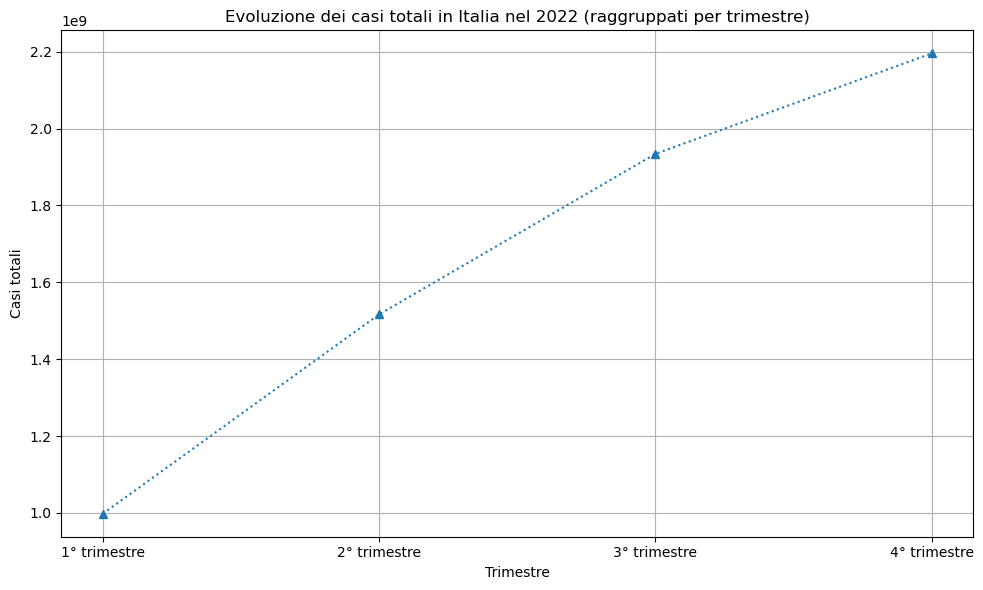

In [40]:
#ESERCIZIO 4
import matplotlib.pyplot as plt

italia = Covid_CSV[(Covid_CSV['location'] == 'Italy') & (Covid_CSV['date'].str.startswith('2022'))].copy()
italia['date'] = pd.to_datetime(italia['date'])
italia['trimestre'] = italia['date'].dt.to_period('Q')
italia_trimestri = italia.groupby('trimestre')['total_cases'].sum()
trimestri_str = italia_trimestri.index.astype(str)

plt.figure(figsize=(10, 6))
plt.plot(trimestri_str, italia_trimestri.values, marker='^', linestyle=':')
plt.title('Evoluzione dei casi totali in Italia nel 2022 (raggruppati per trimestre)')
plt.xlabel('Trimestre')
plt.ylabel('Casi totali')
plt.xticks(trimestri_str, ['1° trimestre', '2° trimestre', '3° trimestre', '4° trimestre'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\acqua\AppData\Local\Temp\ipykernel_18788\689468885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italia_data['date'] = pd.to_datetime(italia_data['date'])


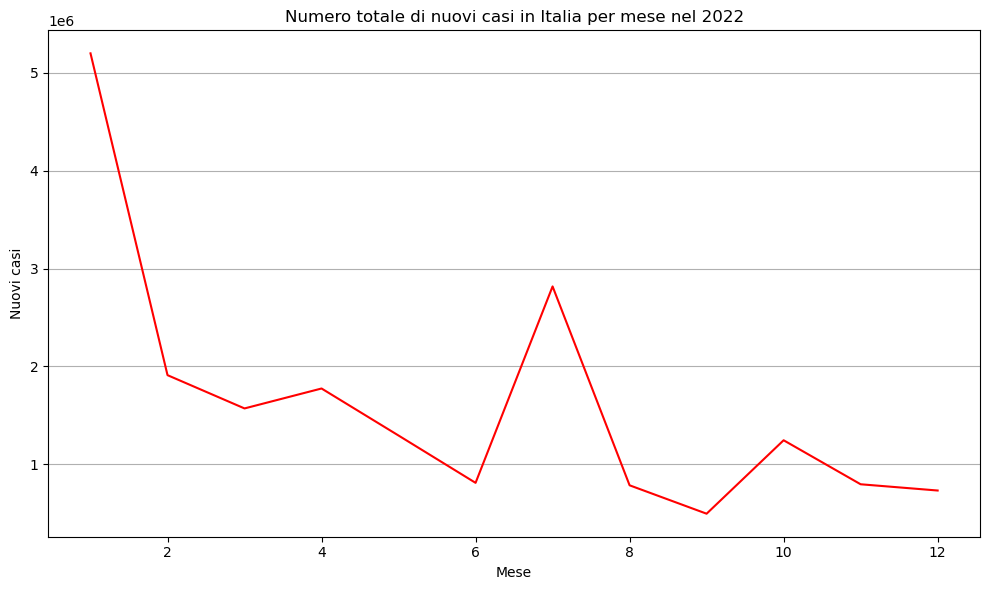

In [69]:
italia_data = Covid_CSV[Covid_CSV['location'] == 'Italy']
italia_data['date'] = pd.to_datetime(italia_data['date'])
italia_data_2022 = italia_data[italia_data['date'].dt.year == 2022]
nuovi_casi_per_mese = italia_data_2022.groupby(italia_data_2022['date'].dt.month)['new_cases'].sum()

nuovi_casi_per_mese = nuovi_casi_per_mese.sort_index()

plt.figure(figsize=(10, 6))
nuovi_casi_per_mese.plot(kind='line', color='red')
plt.title('Numero totale di nuovi casi in Italia per mese nel 2022')
plt.xlabel('Mese')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [70]:
# Covid_CSV['date'] = Covid_CSV['date'].astype(str)

# italy_data = Covid_CSV[(Covid_CSV['location'] == 'Italy') & (Covid_CSV['date'].str.startswith('2022-03'))]

# # Ottieni i valori unici dei nuovi casi per l'Italia
# nuovi_casi_italia = italy_data['new_cases'].unique()

# # Stampa i valori unici dei nuovi casi per l'Italia
# print(nuovi_casi_italia)

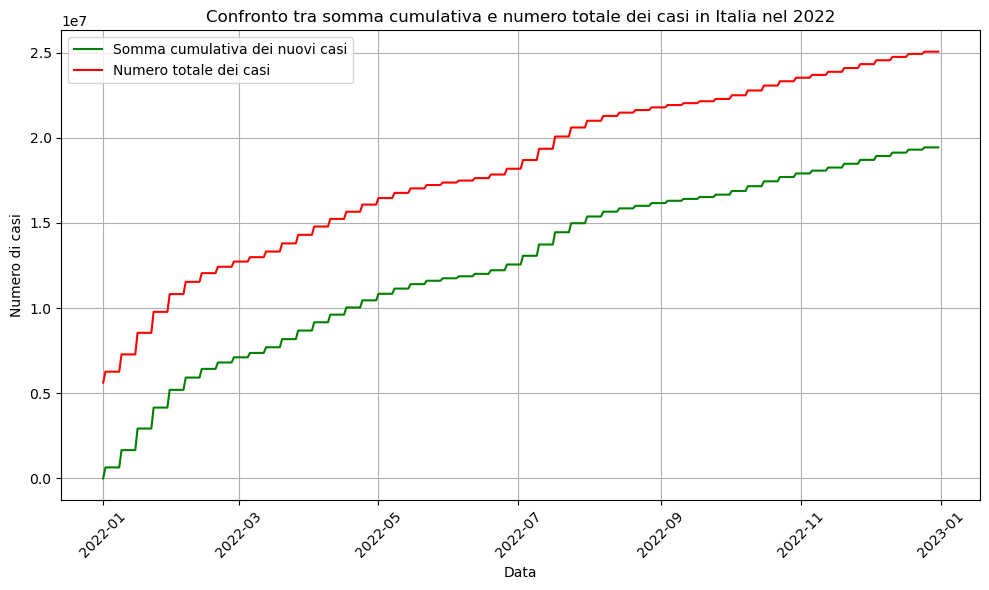

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(italia_data_2022['date'], italia_data_2022['cumul_new_cases'], color='green', label='Somma cumulativa dei nuovi casi')
plt.plot(italia_data_2022['date'], italia_data_2022['total_cases'], color='red', label='Numero totale dei casi')
plt.title('Confronto tra somma cumulativa e numero totale dei casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

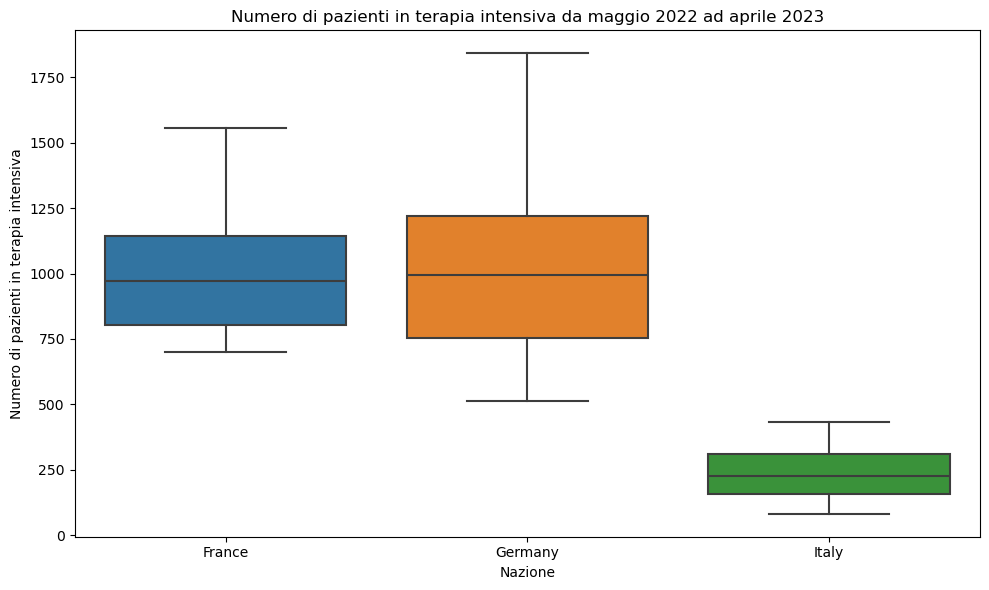

commento: l'Italia ha avuto meno pazienti in terapia intensiva nel periodo selezionato, mentre la Germania sembrerebbe la nazione che ne ha avuti di più


In [80]:
#ESERCIZIO 5
import matplotlib.pyplot as plt
import seaborn as sns 

nazioni = Covid_CSV[Covid_CSV['location'].isin(['Italy', 'Germany', 'France'])]
periodo = nazioni[(nazioni['date'] >= '2022-05-01') & (nazioni['date'] <= '2023-04-30')]

plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=periodo)
plt.title('Numero di pazienti in terapia intensiva da maggio 2022 ad aprile 2023')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva')
plt.tight_layout()
plt.show()
print ("commento: l'Italia ha avuto meno pazienti in terapia intensiva nel periodo selezionato, mentre la Germania sembrerebbe la nazione che ne ha avuti di più")

Somma dei pazienti ospitalizzati per nazione nel 2023:
location
France     268117.0
Germany    897776.0
Italy      592019.0
Spain      299463.0
Name: weekly_hosp_admissions, dtype: float64
Dati nulli sostituiti con la media dei valori non nulli.


C:\Users\acqua\AppData\Local\Temp\ipykernel_18788\3017605706.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nazioni_2['weekly_hosp_admissions'].fillna(media, inplace=True)


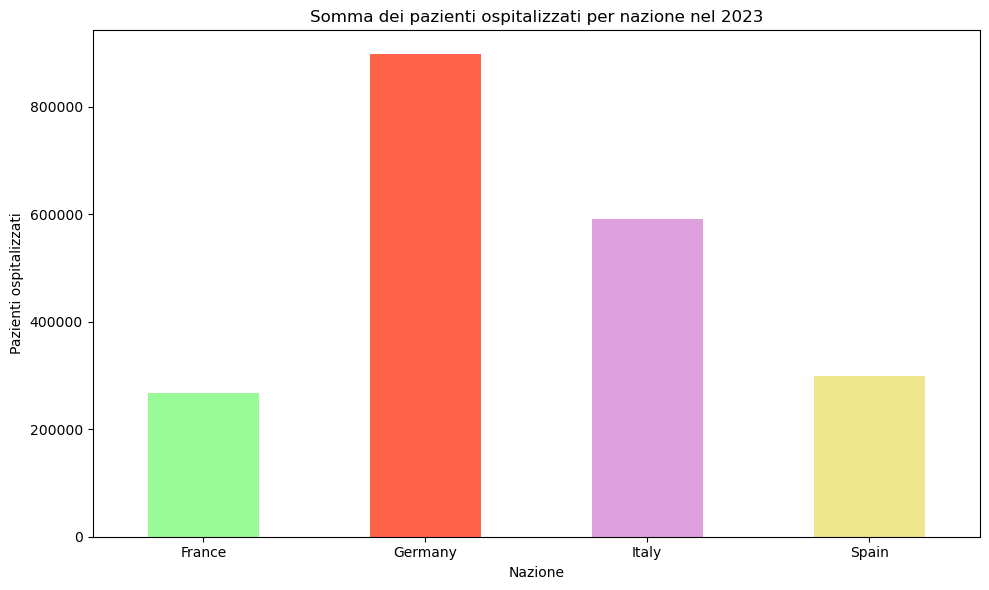

In [99]:
#ESERCIZIO 6

Covid_CSV['date'] = pd.to_datetime(Covid_CSV['date'])
nazioni_2 = Covid_CSV[(Covid_CSV['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (Covid_CSV['date'].dt.year == 2023)]
pazienti_ospitalizzati_per_nazione = nazioni_2.groupby('location')['weekly_hosp_admissions'].sum()

print("Somma dei pazienti ospitalizzati per nazione nel 2023:")
print(pazienti_ospitalizzati_per_nazione)

if nazioni_2['weekly_hosp_admissions'].isnull().any():
    media = nazioni_2['weekly_hosp_admissions'].mean()
    nazioni_2['weekly_hosp_admissions'].fillna(media, inplace=True)
    print("Dati nulli sostituiti con la media dei valori non nulli.")
else:
    print("Non ci sono dati nulli per il numero di pazienti ospitalizzati.")

colori_nazioni = {'Italy': 'plum', 'Germany': 'tomato', 'France': 'palegreen', 'Spain': 'khaki'}

plt.figure(figsize=(10, 6))
pazienti_ospitalizzati_per_nazione.plot(kind='bar', color=[colori_nazioni[nazione] for nazione in pazienti_ospitalizzati_per_nazione.index])
plt.title('Somma dei pazienti ospitalizzati per nazione nel 2023')
plt.xlabel('Nazione')
plt.ylabel('Pazienti ospitalizzati')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [91]:
germania_2023 = Covid_CSV[(Covid_CSV['location'] == 'Germany') & (Covid_CSV['date'].dt.year == 2023)]
somma_pazienti_germania_2023 = germania_2023['weekly_hosp_admissions'].sum()
print(somma_pazienti_germania_2023)

897776.0


In [89]:
Covid_CSV.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't